# **0. PREPARATION AND LIBRARIES**

In [10]:
!pip install opendatasets

In [11]:
! pip install ultralytics

In [12]:
import os

In [13]:
import random
import opendatasets as od
import cv2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import torch
import sys
import os

from PIL import Image
from ultralytics import YOLO, settings
settings.update({'datasets_dir': '/home/playing-cards-object-detection-dataset'})
settings.update({'DATASETS_DIR': '/home/playing-cards-object-detection-dataset'})

%matplotlib inline

In [14]:
# drive.mount('/content/drive')

In [15]:
# move to preferred working directory

# %cd "/content/drive/MyDrive/REA Projects/Object Detection/Playing Card Detection"

In [16]:
# set working directory

HOME = os.getcwd()
print(HOME)

/home


# **1. DOWNLOAD DATASET**

In [7]:
# define train, valid, test directories


train_images = os.path.join(HOME, "playing-cards-object-detection-dataset/train/images")
train_labels = os.path.join(HOME, "playing-cards-object-detection-dataset/train/labels")

valid_images = os.path.join(HOME, "playing-cards-object-detection-dataset/valid/images")
valid_labels = os.path.join(HOME, "playing-cards-object-detection-dataset/valid/labels")

test_images = os.path.join(HOME, "playing-cards-object-detection-dataset/test/images")
test_labels = os.path.join(HOME, "playing-cards-object-detection-dataset/test/labels")

yaml_path = os.path.join(HOME, "playing-cards-object-detection-dataset/data.yaml")

In [8]:
print(train_images)
print(valid_images)
print(test_images)


/home/playing-cards-object-detection-dataset/train/images
/home/playing-cards-object-detection-dataset/valid/images
/home/playing-cards-object-detection-dataset/test/images


In [10]:
yaml_path

'/home/playing-cards-object-detection-dataset/data.yaml'

In [11]:
# Configure YAML

# %writefile "$yaml_path"

# train: ./playing-cards-object-detection-dataset/train/images
# val: ./playing-cards-object-detection-dataset/val/images
# test: ./playing-cards-object-detection-dataset/test/images

# nc: 52
# names: ['10c', '10d', '10h', '10s', '2c', '2d', '2h', '2s', '3c', '3d', '3h', '3s', '4c', '4d', '4h', '4s', '5c', '5d', '5h', '5s', '6c', '6d', '6h', '6s', '7c', '7d', '7h', '7s', '8c', '8d', '8h', '8s', '9c', '9d', '9h', '9s', 'Ac', 'Ad', 'Ah', 'As', 'Jc', 'Jd', 'Jh', 'Js', 'Kc', 'Kd', 'Kh', 'Ks', 'Qc', 'Qd', 'Qh', 'Qs']

In [12]:
# Define the YAML content as a string
yaml_content = """
train: ./playing-cards-object-detection-dataset/train/images
val: ./playing-cards-object-detection-dataset/valid/images
test: ./playing-cards-object-detection-dataset/test/images

nc: 52
names: ['10c', '10d', '10h', '10s', '2c', '2d', '2h', '2s', '3c', '3d', '3h', '3s', '4c', '4d', '4h', '4s', '5c', '5d', '5h', '5s', '6c', '6d', '6h', '6s', '7c', '7d', '7h', '7s', '8c', '8d', '8h', '8s', '9c', '9d', '9h', '9s', 'Ac', 'Ad', 'Ah', 'As', 'Jc', 'Jd', 'Jh', 'Js', 'Kc', 'Kd', 'Kh', 'Ks', 'Qc', 'Qd', 'Qh', 'Qs']
"""

# Write the YAML content to a file
with open(yaml_path, 'w') as file:
  file.write(yaml_content)

In [13]:
# Define the labels

classes = ['10c', '10d', '10h', '10s', '2c', '2d', '2h', '2s', '3c', '3d', '3h', '3s', '4c', '4d', '4h', '4s', '5c', '5d', '5h', '5s', '6c', '6d', '6h', '6s', '7c', '7d', '7h', '7s', '8c', '8d', '8h', '8s', '9c', '9d', '9h', '9s', 'Ac', 'Ad', 'Ah', 'As', 'Jc', 'Jd', 'Jh', 'Js', 'Kc', 'Kd', 'Kh', 'Ks', 'Qc', 'Qd', 'Qh', 'Qs']

Idx2Label = {idx: label for idx, label in enumerate(classes)}
Label2Index = {label: idx for idx, label in Idx2Label.items()}

print('Index to Label Mapping:', Idx2Label)
print('Label to Index Mapping:', Label2Index)

Index to Label Mapping: {0: '10c', 1: '10d', 2: '10h', 3: '10s', 4: '2c', 5: '2d', 6: '2h', 7: '2s', 8: '3c', 9: '3d', 10: '3h', 11: '3s', 12: '4c', 13: '4d', 14: '4h', 15: '4s', 16: '5c', 17: '5d', 18: '5h', 19: '5s', 20: '6c', 21: '6d', 22: '6h', 23: '6s', 24: '7c', 25: '7d', 26: '7h', 27: '7s', 28: '8c', 29: '8d', 30: '8h', 31: '8s', 32: '9c', 33: '9d', 34: '9h', 35: '9s', 36: 'Ac', 37: 'Ad', 38: 'Ah', 39: 'As', 40: 'Jc', 41: 'Jd', 42: 'Jh', 43: 'Js', 44: 'Kc', 45: 'Kd', 46: 'Kh', 47: 'Ks', 48: 'Qc', 49: 'Qd', 50: 'Qh', 51: 'Qs'}
Label to Index Mapping: {'10c': 0, '10d': 1, '10h': 2, '10s': 3, '2c': 4, '2d': 5, '2h': 6, '2s': 7, '3c': 8, '3d': 9, '3h': 10, '3s': 11, '4c': 12, '4d': 13, '4h': 14, '4s': 15, '5c': 16, '5d': 17, '5h': 18, '5s': 19, '6c': 20, '6d': 21, '6h': 22, '6s': 23, '7c': 24, '7d': 25, '7h': 26, '7s': 27, '8c': 28, '8d': 29, '8h': 30, '8s': 31, '9c': 32, '9d': 33, '9h': 34, '9s': 35, 'Ac': 36, 'Ad': 37, 'Ah': 38, 'As': 39, 'Jc': 40, 'Jd': 41, 'Jh': 42, 'Js': 43, 'K

# **2. EXPLORE DATASET**

In [14]:
def visualize_image_with_annotation_bboxes(image_dir, label_dir):
    # Get list of all the image files in the directory
    image_files = sorted(os.listdir(image_dir))

    # Choose 10 random image files from the list
    sample_image_files = random.sample(image_files, 12)

    # Set up the plot
    fig, axs = plt.subplots(4, 3, figsize=(15, 20))

    # Loop over the random images and plot the bounding boxes
    for i, image_file in enumerate(sample_image_files):
        row = i // 3
        col = i % 3

        # Load the image
        image_path = os.path.join(image_dir, image_file)
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Load the labels for this image
        label_path = os.path.join(label_dir, image_file[:-4] + '.txt')
        f = open(label_path, 'r')

        # Loop over the labels and plot the bounding boxes
        for label in f:
            class_id, x_center, y_center, width, height = map(float, label.split())
            h, w, _ = image.shape
            x_min = int((x_center - width/2) * w)
            y_min = int((y_center - height/2) * h)
            x_max = int((x_center + width/2) * w)
            y_max = int((y_center + height/2) * h)
            cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)
            cv2.putText(image, Idx2Label[int(class_id)], (x_min, y_min), cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(255, 255, 255), thickness=2)

        axs[row, col].imshow(image)
        axs[row, col].axis('off')

    plt.show()

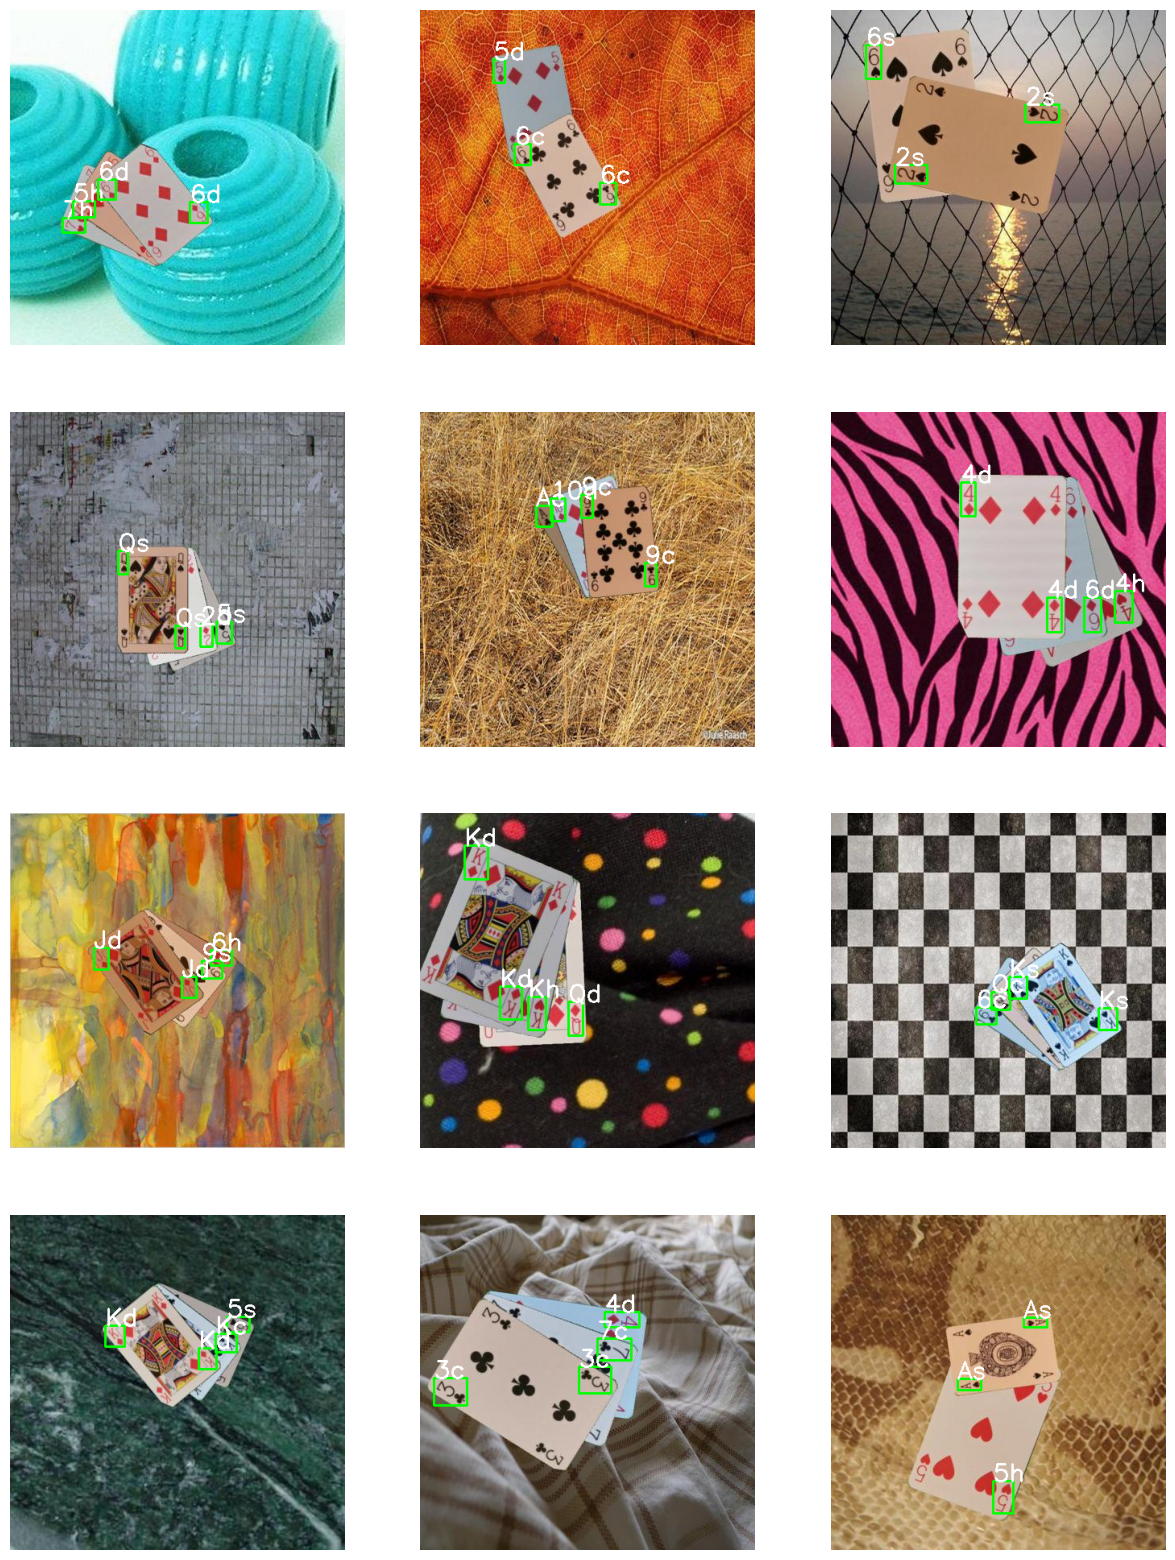

In [15]:
# Visualize 6 sample images with bounding boxes

visualize_image_with_annotation_bboxes(train_images, train_labels)

In [16]:
# Read a image by path
image_path = os.path.join(train_images, os.listdir(train_images)[-1])
image = cv2.imread(image_path)

# Get the size of the image
height, width, channels = image.shape
print('The image has dimensions {}x{} and {} channels'.format(height, width, channels))

The image has dimensions 416x416 and 3 channels


# **3. TRAINING**

In [17]:
# Load a pretrained nano model
model = YOLO('yolov8n.pt')

# free up GPU memory
torch.cuda.empty_cache()

# Training the model
results = model.train(
    mode='train',
    pretrained=True,
    model='/home/stephen/Practice/machine-learning/yolov8-playingcards/trained-models/runs-300-gpu/last.pt',
    task='detect',
    data= yaml_path,
    epochs = 100,
    imgsz = (height, width, channels),
    seed = 42,
    batch = 1,
    workers = 4,
    patience = 5,
    name = 'yolov8n_custom')

New https://pypi.org/project/ultralytics/8.2.45 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.42 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3070 Laptop GPU, 7967MiB)
engine/trainer: task=detect, mode=train, model=/home/stephen/Practice/machine-learning/yolov8-playingcards/trained-models/runs-300-gpu/last.pt, data=/home/playing-cards-object-detection-dataset/data.yaml, epochs=100, time=None, patience=5, batch=1, imgsz=(416, 416, 3), save=True, save_period=-1, cache=False, device=None, workers=4, project=None, name=yolov8n_custom, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=No

train: Scanning /home/playing-cards-object-detection-dataset/train/labels.cache... 14000 images, 0 backgrounds, 0 corrupt: 100%|██████████| 14000/14000 [00:00<?, ?it/s]
val: Scanning /home/playing-cards-object-detection-dataset/valid/labels.cache... 4000 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4000/4000 [00:00<?, ?it/s]


Plotting labels to runs/detect/yolov8n_custom/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 4 dataloader workers
Logging results to runs/detect/yolov8n_custom
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100     0.556G      1.264      4.289     0.9279         10        416: 100%|██████████| 14000/14000 [07:32<00:00, 30.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2000/2000 [00:32<00:00, 61.97it/s]


                   all       4000      15159     0.0396      0.167     0.0383     0.0312

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100     0.468G     0.9871      3.095     0.8654          4        416: 100%|██████████| 14000/14000 [07:31<00:00, 31.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2000/2000 [00:30<00:00, 65.13it/s]


                   all       4000      15159      0.116      0.416      0.139      0.116

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100     0.455G     0.9696      2.629      0.863          8        416: 100%|██████████| 14000/14000 [07:33<00:00, 30.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2000/2000 [00:28<00:00, 69.37it/s]


                   all       4000      15159       0.27       0.56      0.298       0.25

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100     0.449G     0.9219      2.261     0.8545          3        416: 100%|██████████| 14000/14000 [07:30<00:00, 31.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2000/2000 [00:28<00:00, 70.43it/s]


                   all       4000      15159       0.39      0.665      0.493      0.423

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100     0.442G     0.8606      1.856     0.8439          1        416: 100%|██████████| 14000/14000 [07:32<00:00, 30.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2000/2000 [00:28<00:00, 70.24it/s]


                   all       4000      15159      0.553      0.745      0.666      0.577

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      0.44G     0.8136      1.577     0.8353          1        416: 100%|██████████| 14000/14000 [07:36<00:00, 30.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2000/2000 [00:29<00:00, 68.08it/s]


                   all       4000      15159      0.669      0.782      0.784      0.685

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100     0.438G      0.788      1.377     0.8322          5        416: 100%|██████████| 14000/14000 [07:37<00:00, 30.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2000/2000 [00:29<00:00, 68.70it/s]


                   all       4000      15159      0.741      0.824      0.843      0.739

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100     0.436G     0.7648       1.27     0.8266          4        416: 100%|██████████| 14000/14000 [07:39<00:00, 30.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2000/2000 [00:29<00:00, 68.19it/s]


                   all       4000      15159      0.793      0.861      0.889      0.782

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100     0.436G     0.7432      1.165     0.8221          4        416: 100%|██████████| 14000/14000 [07:40<00:00, 30.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2000/2000 [00:28<00:00, 68.98it/s]


                   all       4000      15159      0.831      0.881      0.915      0.809

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100     0.434G     0.7267      1.078     0.8175          4        416: 100%|██████████| 14000/14000 [07:41<00:00, 30.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2000/2000 [00:29<00:00, 68.38it/s]


                   all       4000      15159      0.865      0.911      0.935      0.831

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100     0.434G      0.721      1.037     0.8186          4        416: 100%|██████████| 14000/14000 [07:25<00:00, 31.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2000/2000 [00:29<00:00, 67.99it/s]


                   all       4000      15159      0.848      0.913      0.938      0.835

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100     0.434G     0.7028     0.9909     0.8155          8        416: 100%|██████████| 14000/14000 [07:14<00:00, 32.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2000/2000 [00:31<00:00, 63.53it/s]


                   all       4000      15159      0.884      0.927      0.945      0.843

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100     0.434G     0.6921     0.9411     0.8131          3        416: 100%|██████████| 14000/14000 [07:15<00:00, 32.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2000/2000 [00:31<00:00, 63.94it/s]


                   all       4000      15159      0.907      0.922      0.963      0.861

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100     0.432G     0.6812     0.9094     0.8155          6        416: 100%|██████████| 14000/14000 [07:14<00:00, 32.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2000/2000 [00:31<00:00, 63.48it/s]


                   all       4000      15159      0.915      0.936      0.963      0.862

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100     0.432G     0.6809     0.8943      0.812          2        416: 100%|██████████| 14000/14000 [07:12<00:00, 32.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2000/2000 [00:31<00:00, 63.94it/s]

                   all       4000      15159        0.9      0.937       0.96      0.861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100     0.432G     0.6688     0.8612     0.8122          0        416: 100%|██████████| 14000/14000 [07:08<00:00, 32.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2000/2000 [00:30<00:00, 65.67it/s]

                   all       4000      15159       0.93      0.951      0.973      0.875



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100     0.432G     0.6605     0.8444     0.8081          4        416: 100%|██████████| 14000/14000 [07:03<00:00, 33.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2000/2000 [00:30<00:00, 65.51it/s]


                   all       4000      15159      0.929      0.957      0.972      0.877

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100     0.432G     0.6569     0.8307     0.8077          3        416: 100%|██████████| 14000/14000 [07:03<00:00, 33.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2000/2000 [00:30<00:00, 65.46it/s]

                   all       4000      15159      0.929      0.951      0.974       0.88



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100     0.432G      0.652     0.8126     0.8081          1        416: 100%|██████████| 14000/14000 [07:03<00:00, 33.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2000/2000 [00:30<00:00, 65.76it/s]

                   all       4000      15159      0.937      0.946      0.976      0.883



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100     0.432G     0.6404     0.7931     0.8069          7        416: 100%|██████████| 14000/14000 [07:02<00:00, 33.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2000/2000 [00:30<00:00, 65.99it/s]


                   all       4000      15159      0.933      0.954      0.976       0.88

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100     0.432G     0.6323     0.7743     0.8039          4        416: 100%|██████████| 14000/14000 [07:01<00:00, 33.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2000/2000 [00:30<00:00, 65.69it/s]


                   all       4000      15159      0.937      0.964      0.977      0.884

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100     0.432G     0.6335     0.7641     0.8044          9        416: 100%|██████████| 14000/14000 [07:02<00:00, 33.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2000/2000 [00:30<00:00, 65.75it/s]

                   all       4000      15159      0.944      0.965       0.98      0.888



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100     0.432G      0.626     0.7479      0.804          4        416: 100%|██████████| 14000/14000 [07:02<00:00, 33.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2000/2000 [00:30<00:00, 66.02it/s]


                   all       4000      15159      0.948      0.965      0.981      0.892

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100     0.432G     0.6244     0.7141     0.8027         10        416: 100%|██████████| 14000/14000 [07:02<00:00, 33.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2000/2000 [00:30<00:00, 65.99it/s]


                   all       4000      15159      0.934      0.924      0.969       0.88

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100     0.432G     0.6201     0.6931     0.8035         11        416: 100%|██████████| 14000/14000 [07:01<00:00, 33.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2000/2000 [00:30<00:00, 65.30it/s]


                   all       4000      15159      0.937      0.909      0.965      0.876

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100     0.432G     0.6192       0.68     0.8048          5        416: 100%|██████████| 14000/14000 [07:09<00:00, 32.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2000/2000 [00:31<00:00, 64.03it/s]


                   all       4000      15159      0.929      0.917      0.964      0.873

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100     0.432G     0.6163     0.6893     0.8012          8        416: 100%|██████████| 14000/14000 [07:11<00:00, 32.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2000/2000 [00:31<00:00, 64.31it/s]

                   all       4000      15159      0.925      0.922      0.964      0.873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100     0.432G     0.6101     0.6604     0.8006          4        416: 100%|██████████| 14000/14000 [07:11<00:00, 32.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2000/2000 [00:31<00:00, 64.15it/s]

                   all       4000      15159      0.933      0.925      0.968       0.88
EarlyStopping: Training stopped early as no improvement observed in last 5 epochs. Best results observed at epoch 23, best model saved as best.pt.
To update EarlyStopping(patience=5) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



28 epochs completed in 3.644 hours.
Optimizer stripped from runs/detect/yolov8n_custom/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/yolov8n_custom/weights/best.pt, 6.2MB

Validating runs/detect/yolov8n_custom/weights/best.pt...
Ultralytics YOLOv8.2.42 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3070 Laptop GPU, 7967MiB)
Model summary (fused): 168 layers, 3015788 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2000/2000 [00:18<00:00, 110.40it/s]


                   all       4000      15159      0.948      0.965      0.981      0.892
                   10c        180        282      0.938      0.972      0.989      0.858
                   10d        188        290      0.973       0.98      0.993      0.865
                   10h        201        322      0.952      0.969      0.989      0.849
                   10s        165        250      0.992       0.97      0.994      0.857
                    2c        193        295       0.94       0.99      0.993      0.925
                    2d        167        259      0.975      0.985      0.995      0.921
                    2h        187        294      0.964      0.989      0.994       0.91
                    2s        192        299      0.984       0.97       0.99      0.909
                    3c        201        308      0.935      0.997      0.993      0.934
                    3d        167        250       0.98      0.967      0.988      0.905
                    3

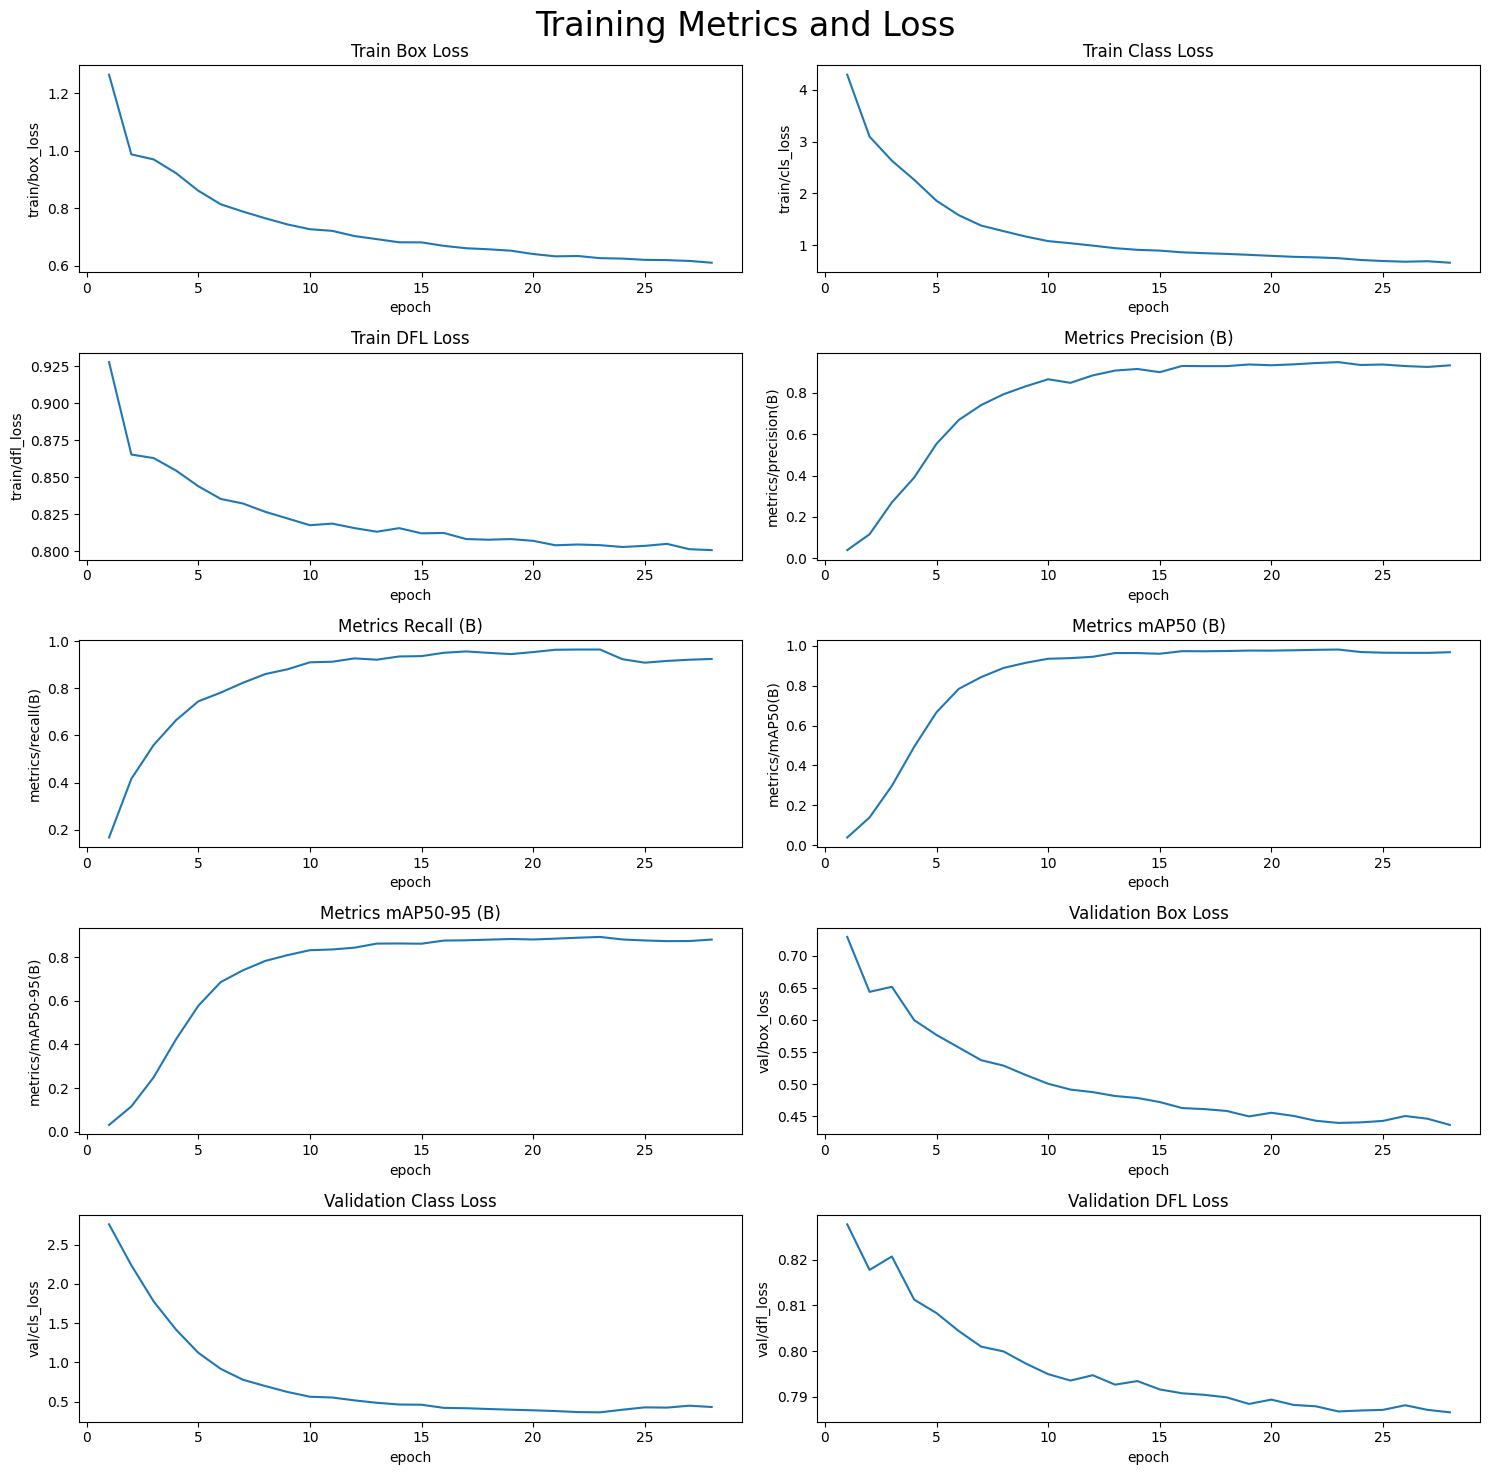

In [18]:
# plot the result

%matplotlib inline
# read in the results.csv file as a pandas dataframe
df = pd.read_csv('./runs/detect/yolov8n_custom/results.csv')
df.columns = df.columns.str.strip()

# create subplots using seaborn
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

# plot the columns using seaborn
sns.lineplot(x='epoch', y='train/box_loss', data=df, ax=axs[0,0])
sns.lineplot(x='epoch', y='train/cls_loss', data=df, ax=axs[0,1])
sns.lineplot(x='epoch', y='train/dfl_loss', data=df, ax=axs[1,0])
sns.lineplot(x='epoch', y='metrics/precision(B)', data=df, ax=axs[1,1])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=df, ax=axs[2,0])
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=df, ax=axs[2,1])
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=df, ax=axs[3,0])
sns.lineplot(x='epoch', y='val/box_loss', data=df, ax=axs[3,1])
sns.lineplot(x='epoch', y='val/cls_loss', data=df, ax=axs[4,0])
sns.lineplot(x='epoch', y='val/dfl_loss', data=df, ax=axs[4,1])

# set titles and axis labels for each subplot
axs[0,0].set(title='Train Box Loss')
axs[0,1].set(title='Train Class Loss')
axs[1,0].set(title='Train DFL Loss')
axs[1,1].set(title='Metrics Precision (B)')
axs[2,0].set(title='Metrics Recall (B)')
axs[2,1].set(title='Metrics mAP50 (B)')
axs[3,0].set(title='Metrics mAP50-95 (B)')
axs[3,1].set(title='Validation Box Loss')
axs[4,0].set(title='Validation Class Loss')
axs[4,1].set(title='Validation DFL Loss')

# add suptitle and subheader
plt.suptitle('Training Metrics and Loss', fontsize=24)

# adjust top margin to make space for suptitle
plt.subplots_adjust(top=0.8)

# adjust spacing between subplots
plt.tight_layout()

plt.show()

# **4. EVALUATION**

In [19]:
# Loading the best performing model
model = YOLO('./runs/detect/yolov8n_custom/weights/best.pt')

# Evaluating the model on test dataset
metrics = model.val(conf=0.25, split='test')

Ultralytics YOLOv8.2.42 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3070 Laptop GPU, 7967MiB)
Model summary (fused): 168 layers, 3015788 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /home/playing-cards-object-detection-dataset/test/labels.cache... 2000 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2000/2000 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 125/125 [00:06<00:00, 19.33it/s]


                   all       2000       7588      0.945      0.973      0.981      0.907
                   10c         89        137      0.943      0.964       0.98      0.858
                   10d        103        170      0.952      0.988      0.989       0.88
                   10h        100        149      0.967      0.966       0.99      0.866
                   10s         96        151      0.977          1      0.995      0.877
                    2c         90        139      0.942      0.993      0.994      0.932
                    2d        101        158      0.975      0.968      0.989      0.924
                    2h        100        156       0.97      0.994      0.995      0.934
                    2s         95        153      0.983      0.987      0.991      0.928
                    3c         98        155      0.971      0.981      0.994      0.947
                    3d         95        143      0.948      0.958       0.98      0.911
                    3

In [20]:
print(f"Mean Average Precision @.5:.95 : {metrics.box.map}")
print(f"Mean Average Precision @ .50   : {metrics.box.map50}")
print(f"Mean Average Precision @ .70   : {metrics.box.map75}")

Mean Average Precision @.5:.95 : 0.9066663151344979
Mean Average Precision @ .50   : 0.9806146494113647
Mean Average Precision @ .70   : 0.9791746782863556


# **5. PREDICTION**

In [21]:
# Function to perform detections with trained model
def predict_detection(image_path):
    # Read the image
    image = cv2.imread(image_path)

    # Pass the image through the detection model and get the result
    detect_result = model(image)

    # Plot the detections
    detect_image = detect_result[0].plot()

    # Convert the image to RGB format
    detect_image = cv2.cvtColor(detect_image, cv2.COLOR_BGR2RGB)

    return detect_image


0: 416x416 2 7cs, 2 Kds, 3.0ms
Speed: 0.5ms preprocess, 3.0ms inference, 0.8ms postprocess per image at shape (1, 3, 416, 416)

0: 416x416 2 9ss, 4 Ahs, 3.3ms
Speed: 0.6ms preprocess, 3.3ms inference, 0.7ms postprocess per image at shape (1, 3, 416, 416)

0: 416x416 1 10s, 1 4c, 1 4h, 2 4ss, 4.2ms
Speed: 0.6ms preprocess, 4.2ms inference, 1.1ms postprocess per image at shape (1, 3, 416, 416)

0: 416x416 2 8ss, 1 Ac, 1 Kh, 3.3ms
Speed: 0.6ms preprocess, 3.3ms inference, 0.7ms postprocess per image at shape (1, 3, 416, 416)

0: 416x416 2 10cs, 2 Kcs, 3.2ms
Speed: 0.5ms preprocess, 3.2ms inference, 0.7ms postprocess per image at shape (1, 3, 416, 416)

0: 416x416 2 3ds, 4 8hs, 3.1ms
Speed: 0.5ms preprocess, 3.1ms inference, 0.7ms postprocess per image at shape (1, 3, 416, 416)

0: 416x416 2 4cs, 2 7ds, 3.7ms
Speed: 0.5ms preprocess, 3.7ms inference, 0.7ms postprocess per image at shape (1, 3, 416, 416)

0: 416x416 3 Ass, 2 Kcs, 3.2ms
Speed: 0.5ms preprocess, 3.2ms inference, 0.7ms postpr

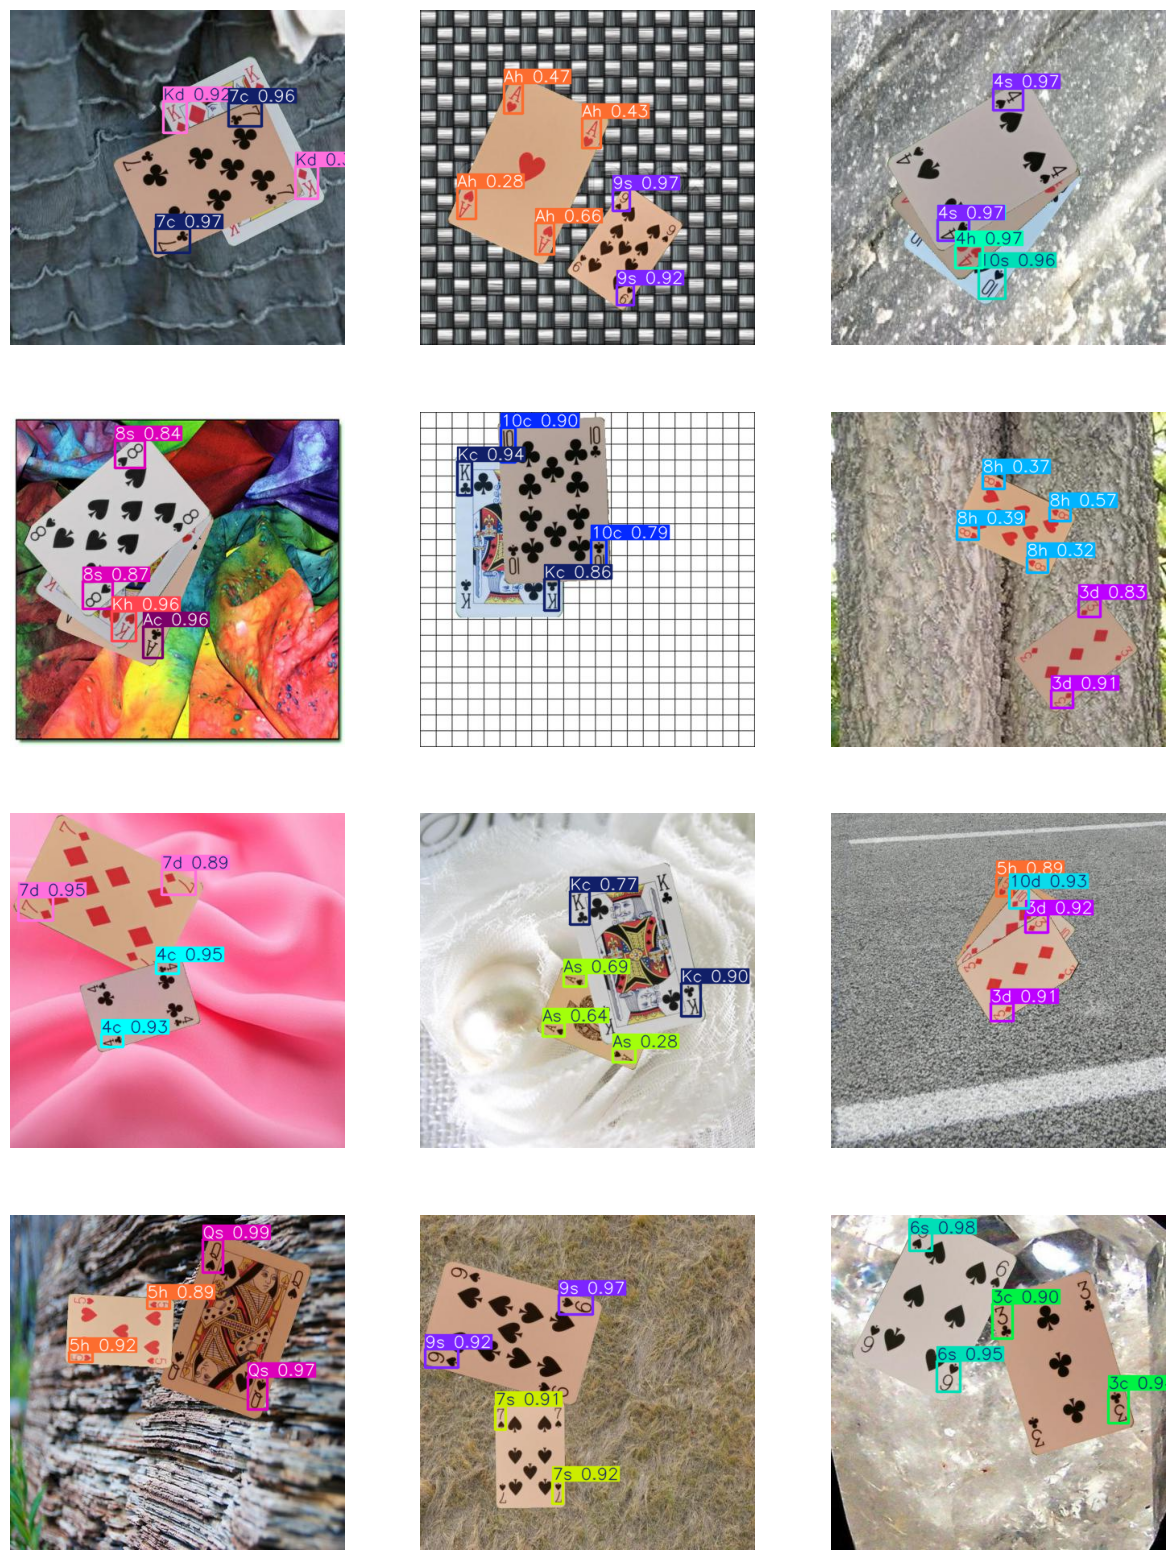

In [22]:
# Get list of all the image files in the test directory
image_files = sorted(os.listdir(test_images))

# Choose 12 random image files from the list
sample_image_files = random.sample(image_files, 12)

# Set up the plot
fig, axs = plt.subplots(4, 3, figsize=(15, 20))

# Loop over the random images and plot the detections of the trained model
for i, image_file in enumerate(sample_image_files):
    row = i // 3
    col = i % 3

    # Load the current image and run object detection
    image_path = os.path.join(test_images, image_file)
    detect_image = predict_detection(image_path)

    axs[row, col].imshow(detect_image)
    axs[row, col].axis('off')

plt.show()

In [17]:
# convert to tflite
from ultralytics import YOLO, settings
settings.update({'datasets_dir': '/home/playing-cards-object-detection-dataset'})
# settings.update({'DATASETS_DIR': '/home/playing-cards-object-detection-dataset'})
# dataset_yaml = f"{$DATASETS_DIR}/{data.yaml}"
# print(dataset_yaml)

model_path = '/home/trained-models/runs-255/best-255.pt'
model = YOLO(model_path)
model.export(format="edgetpu")  
tensorrt_model = YOLO("best-255_full_integer_quant_edgetpu.engine")

'''
model.export(
    format='tflite int32',    
    imgsz=640,
    int8=False,
    data="/home/playing-cards-object-detection-dataset/data.yaml", 
    batch=4)
'''
# tflite_model = YOLO('./models/best-300_saved_model/best-300_float32.tflite', task='detect')
# test = tflite_model.predict('/home/stephen/Projects/yolo8/yolo-detect-playing-card/images/hands/test-3-cards.jpg')



ValueError: Invalid export format='tflite int32'. Valid formats are ('torchscript', 'onnx', 'openvino', 'engine', 'coreml', 'saved_model', 'pb', 'tflite', 'edgetpu', 'tfjs', 'paddle', 'ncnn')